<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Aperçu-des-données-nutritionnelles" data-toc-modified-id="Aperçu-des-données-nutritionnelles-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Aperçu des données nutritionnelles</a></span><ul class="toc-item"><li><span><a href="#Découvrir-des-exemples-de-produits-par-nutriscore" data-toc-modified-id="Découvrir-des-exemples-de-produits-par-nutriscore-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Découvrir des exemples de produits par nutriscore</a></span></li></ul></li></ul></div>

In [8]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import Layout

#from zipfile import ZipFile, Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import voila
import streamlit as st

#import statsmodels.api as sm
import plotly.graph_objects as go
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
#from functions import *

import warnings
warnings.filterwarnings('ignore')

def f(x):
    return x

#interact(f, x=10)

Etude pour les agents de la santé publique
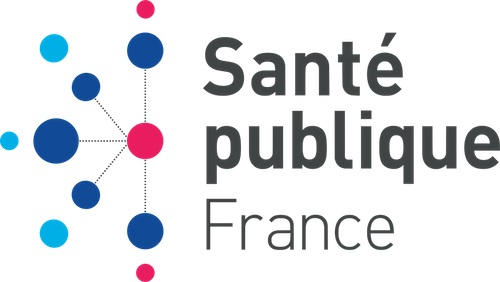

In [ ]:
data_load = pd.read_csv("./data/PGclean_data.csv",low_memory=False) #index_col="product_name"
print("Des données optimisées d'OpenFoodFacts sont chargées avec succes")
#data_load.head(10)

In [9]:
# fonctions interactive 

#unique_nutri = df..unique()

# nutriscore_choice = widgets.SelectMultiple(
#     #options = unique_nutri.tolist(),
#     value = ['A', 'B', 'C', 'D', 'E'],
#     description='Choix d\'un nutriscore',
#     disabled=False,
#     layout = Layout(width='50%', height='80px', display='flex')
# )


TraitError: Invalid selection: value not found

In [ ]:
# fig = go.Figure()
# fig.add_trace(go.Scatter(y=[2, 1, 4, 3]))
# fig.add_trace(go.Bar(y=[1, 4, 3, 2]))
# fig.update_layout(title = 'Hello Figure')
# fig.show()

# Aperçu des données nutritionnelles #


Visualisez le type de données nettoyées:

In [2]:
data_load.head(5)

NameError: name 'data_load' is not defined

## Découvrir des exemples de produits par nutriscore ##

Sélectionnez le nutriscore (entre A et E), pour voir une liste de produits

In [ ]:
#nutriscore_choice
data_france[data_france['nutriscore_grade']=='a'].head(5)